In [ ]:
# default_exp assignment_part_1_solution

# Assignment Part 1 Solution

--------------------

## Laplace Transforms

1. Calculate the Laplace Transform $X(s)$ of the signal $x(t)$:

$$
x(t) = (4t-3cos(5t))e^{-2t}
$$

$$
x(t)=4te^{-2t} - 3cos(5t)e^{-2t} \rightarrow X(s) = 4 \frac{1}{(s+2)^2} - 3 \frac{(s+2)}{(s+2)^2 + 25}
$$

Let's verify it with Sympy

In [ ]:
import sympy
t, s = sympy.symbols('t, s')

In [ ]:
f1 = 4*t*sympy.exp(-2*t)
f2 = - 3*sympy.cos(5*t)*sympy.exp(-2*t)
print('{} {}'.format(f1, f2)) 

4*t*exp(-2*t) -3*exp(-2*t)*cos(5*t)


In [ ]:
F1 = sympy.laplace_transform(f1, t, s, noconds=True)
F2 = sympy.laplace_transform(f2, t, s, noconds=True)
print('{} {}'.format(F1, F2)) 

4/(s + 2)**2 -(3*s + 6)/((s + 2)**2 + 25)


2. Calculate the Inverse Laplace Transform $g(t)$ of the transfer function $G(s)$:

$$
G(s)=2 + \frac{3}{2s^3+3s^2+s}
$$

$$
G(s)=2 + \frac{3}{2s^3+3s^2+s} = 2 + \frac{3}{s(2s^2+3s+1)} = 2 + \frac{3}{2s(s+1)(s+\frac{1}{2})} = 2 + \frac{3}{s} + \frac{3}{s+1} + \frac{-6}{s+\frac{1}{2}}
$$

$$
g(t) = 2\delta(t) + 3 + 3e^{-t} -6e^{-0.5t}
$$

In [ ]:
F1 = 2
F2 = 3/(2*s**3+3*s**2+s)

In [ ]:
f1 = sympy.inverse_laplace_transform(F1, s, t)
f2 = sympy.inverse_laplace_transform(F2, s, t)
print('{} {}'.format(f1, f2)) 

2*DiracDelta(t) 3*Heaviside(t) + 3*exp(-t)*Heaviside(t) - 6*exp(-t/2)*Heaviside(t)


## Block Diagrams

3. Calculate the equivalent transfer function $G_t(s)=\frac{Y(s)}{R_1(s)}$ of the following block diagram:

<tr>
<td> <img src="img/homework/block-diagram-1.png" alt="block-diagram.png" style="width: 550px;"/> </td>
</tr>



<tr>
<td> <img src="img/homework/block-diagram-solution-1.png" alt="block-diagram.png" style="width: 550px;"/> </td>
</tr>


<tr>
<td> <img src="img/homework/block-diagram-solution-2.png" alt="block-diagram.png" style="width: 550px;"/> </td>
</tr>

<tr>
<td> <img src="img/homework/block-diagram-solution-3.png" alt="block-diagram.png" style="width: 550px;"/> </td>
</tr>

## System Response

4. Write the transfer function to a step input of a second order system characterised by:
- Static gain $G(0)=5$
- Damping ratio $\xi=0.5$ 
- Settling time $t_s=3 s$
- No zeros

We would like a system with form:
$$
\frac{K}{s^2+2\xi\omega_ns+\omega_n^2}
$$

we also know that:

$$
t_s \approx -\frac{1}{\xi\omega_n}ln(0.05)
$$

from which:

$$
\omega_n = -\frac{1}{3\cdot0.5}ln(0.05) = 2
$$

which means:

$$
\frac{K}{s^2+2s+4}
$$

since we want $G(0)=5 \rightarrow K=20$

$$
\frac{20}{s^2+2s+4}
$$

5. Plot the qualitative behaviour of the step response of the system:

$$
G(s)=\frac{20(3+0.1s)(s^2+10s+160)}{(2s+10)(0.1s+5)(s^2+2s+400)}
$$

Let's re-write the transfer function slightly:


$$
G(s)=\frac{20\cdot0.1(30+s)(s^2+10s+160)}{2(s+\frac{10}{2})0.1(s+\frac{5}{0.1})(s^2+2s+400)}
$$


The poles are:

$$
s = -5, -50, -1.+19.97498436j, -1.-19.97498436j
$$

and the zeros are:

$$
s = -30, -5.+11.61895004j, -5.-11.61895004j
$$

The system is asymptotically stable, we can use the dominant poles approximation:

$$
G(s)=\frac{20\cdot0.1\cdot30\cdot160}{2\cdot5\cdot0.1\cdot50(s^2+2s+400)} = \frac{192}{(s^2+2s+400)}
$$


The response to a step input can be obtained as:

$$
Y(s) = G(s)\frac{1}{s} = \frac{192}{(s^2+2s+400)}\frac{1}{s}
$$

And, using partial fraction decomposition:

$$
Y(s) = \frac{K}{s} + \frac{A}{s-p_1} + \frac{A^*}{s-p_1^*}
$$

Where

$$
K = \frac{192}{(s^2+2s+400)} \bigg |_{s=0} = \frac{192}{400} = 0.48
$$



And for the pole $p_1=−1.+19.97498436𝑗$

We know that when we have complex conjugate poles - see notebook `03_Transfer_function`:

$$
f(t) = |A|e^{\sigma t} \big [   e^{j(\Phi_A+\omega t)} + e^{-j(\Phi_A+\omega t)}  \big ] = 2|A|e^{\sigma t}\cos(\Phi_A+\omega t)
$$


where:

$$
A = (s-p_1)\frac{192}{s(s-p_1)(s-p_1^*)} \bigg |_{s=-1+20j} = \frac{192}{s(s-p_1^*)} \bigg |_{s=-1+20j} = \frac{192}{(-1+20j)(
40j)} = -0.24+0.012j
$$

In [ ]:
abs(-0.24+0.012)

0.22799999999999998

In [ ]:
abs(192/(40j*(-1+20j)))

0.2397005613306827

and the response is

$$
y(t) = K + Ae^{p_1}t + A^*e^{p_1^*}t = K + 2|A|e^{\sigma t}cos(\omega t + \angle{A})
$$

where $p_1=\sigma+\omega t$ and $A=|A|e^{j\angle{A}}$

$$
y(t) = 0.48 + 2*0.23*e^{-1t}cos(20t -\frac{\pi}{2})
$$

We can check that the inverse laplace of the system transfer function using Sympy:

In [ ]:
def evaluate(f, times):
    res = []
    for time in times:        
        res.append(f.evalf(subs={t:time}).n(chop=1e-5))
    return res
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
t, s = sympy.symbols('t, s')
F = 192/(s**2+2*s+400)
invL(F)

64*sqrt(399)*exp(-t)*sin(sqrt(399)*t)*Heaviside(t)/133

Where:

In [ ]:
np.sqrt(399)

19.974984355438178

And now we can plot it to verify the step response:

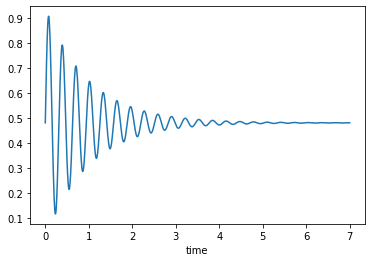

In [ ]:
time = np.linspace(0, 7, 1000)
y = 0.48 + 2*0.23*np.exp(-time)*np.cos(20*time-cmath.pi/2)
plt.plot(time, y)
plt.xlabel('time');

Finally, let's compare the result we got with what Sympy calculates

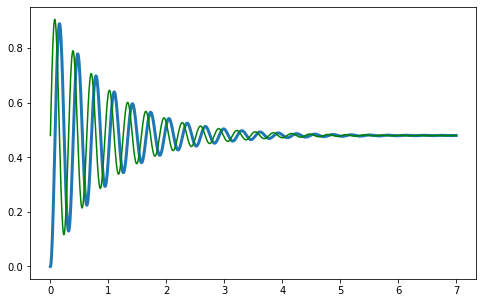

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

time = np.linspace(0,7,1000)

ax.plot(time, evaluate(invL(F*1/s), time), linewidth=3)
ax.plot(time, y, 'g')

We can also use the Python Control Library to verify our dominant pole approximation

In [ ]:
import control
import matplotlib.pyplot as plt

In [ ]:
s = control.TransferFunction.s
G = (20*(3+0.1*s)*(s**2+10*s+160))/((2*s+10)*(0.1*s+5)*(s**2 + 2*s + 400))
G_approx = 192/(s**2 + 2*s + 400)

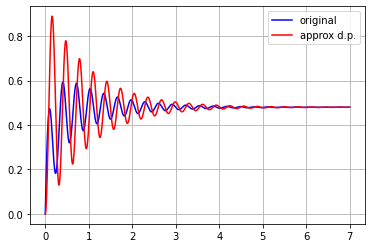

In [ ]:
T, yout = control.step_response(G, T=np.linspace(0, 7, 1000));
Tap, youtap = control.step_response(G_approx, T=np.linspace(0, 7, 1000));

plt.plot(T, yout, 'b', label='original')
plt.plot(Tap, youtap, 'r', label='approx d.p.')
plt.legend()
plt.grid()

6. For the system $G(s)$ defined above, calculate:

- Its steady state value $y_\infty$ to a step input (when $t \rightarrow \infty$)
- Its settling time $t_s$
- If the system oscillates, calculate the period $T_\omega$ of the oscillation

- $y(t\rightarrow\infty) = 0.48$
- $t_s \approx -\frac{1}{\xi\omega_n}ln(0.05) \approx 3$

given that:
 - $\omega_n=\sqrt{399}\approx20$
 - $2\xi\omega_n=2 \rightarrow 20 \xi =1 \rightarrow \xi = 0.05$
 
And finally:
- $T_{P} = \frac{2\pi}{w_n\sqrt{1-\xi^2}} = 0.314s$

In [ ]:
xi = 0.05
wn = 20
t_s = -1/(xi*wn)*np.log(0.05)
print('t_s = {}'.format(t_s))

Tp = 2*3.14/(wn*np.sqrt(1-xi**2))

print('T_ = {}'.format(Tp))

t_s = 2.995732273553991
T_ = 0.3143932374740646


## Routh Criterion

7. Determine the values of $K$ for which the following feedback system is asymptotically stable:

<tr>
<td> <img src="img/homework/block-diagram-routh.png" alt="block-diagram-routh.png" style="width: 550px;"/> </td>
</tr>


The characteristic equation of the feedback system is:

$$
1+K\frac{s^2+2s+64}{s^2(s+0.5)} = 0 \rightarrow s^2(s+0.5)+K(s^2+2s+64) = 0 \rightarrow s^3 + (0.5+K)s^2 + 2Ks+64K=0
$$

The Routh table is:

| | | |
|-|-|-|
|$3$| $1$ | $2K$ |
|$2$| $0.5+K$ | $64K$ |
|$1$| $(0.5+K)2K-64K$ | $0$ |
|$0$| $64K$ | |

from which it is possible to find the following constraints on $K$:

$$
0.5 + K > 0, \hspace{0.5cm} 2K^2 +1K-64K > 0, \hspace{0.5cm}K>0
$$

$$
K>0.5, \hspace{0.5cm} K>31.5, \hspace{0.5cm} K>0
$$

And the system is asymptotically stable for $K>31.5$

## Bode Plots

8. Plot the Bode amplitude and phase plots for the system discussed in question 7.

$$
G_d(s) = \frac{s^2+2s+64}{s^2(s+0.5)}= \frac{64(\frac{s^2}{64}+\frac{2s}{64}+1)}{0.5s^2(\frac{s}{0.5}+1)}
$$

$K_{dB}=20\log(64/0.5) \approx 42 dB$

<tr>
<td> <img src="img/homework/bode-1.png" alt="bode-1.png" style="width: 550px;"/> </td>
</tr>

## DC Motor Transfer Functions

The figures below represents a DC motor attached to an inertial load.

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/dc-motor.png" alt="dc-motor-wiring" style="width: 300px;"/> </td>
    <td> <img src="img/homework/dc-motor-sketch.png" alt="dc-motor-sketch" style="width: 300px;"/> </td>
    </tr>
</table>

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/dc-motor-pancake.png" alt="dc-motor-pancake" style="width: 600px;"/> </td>    
    </tr>
</table>

The input voltage can be applied to either the field or the armature terminals.
The voltages applied to the field and armature sides of the motor are represented by $V_f$ and $V_a$.

The resistances and inductances of the field and armature sides of the motor are represented by $R_f$ , $L_f$, $R_a$, and $L_a$.
The torque generated by the motor can be assumed to be related linarly to $i_f$ and $i_a$, the currents in the field and armature sides of the motor, as follows:

$$
T_m = K i_f i_a  \;\;\;\;(1)
$$

From the equation above, clearly to retain the linearity, one current must be kept constant, while the other becomes the input current.

This makes it possible to have field-current or armature-current controlled motors. 
We will focus on the field-current motor for our analysis.

This means that in a field-current controlled motor, the armature current is kept constant, while the field current $i_a$ is controlled through the field voltage $V_f$.

$$
T_m = K i_f i_a = K_m i_f  \;\;\;\;(2)
$$

where $K_m$ is defined as the motor constant. The motor torque increases linearly with the field current.

**1. Write the Transfer Function from the input current to the resulting torque of the previous equation**

$$
 \frac{T_m(s)}{I_f(s)} = K_m
$$

For the field side of the motor the voltage/current relationship is
$$
V_f =V_R +V_L
 = R_f i_f +L_f (di_f dt)   \;\;\;\;(3)
$$




 **2. Write the Transfer Function from the input voltage to the resulting current**
 
 Vf = RfI+LsI
 
 I = Vf/Lf/(Rf/Lf+s)
 
$$
\frac{I_f(s)}{V_f(s)} = \frac{\frac{1}{L_f}}{s+\frac{R_f}{L_f}}  \;\;\;\;(4)
$$

**3. Write the Transfer Function from the input voltage to the resulting motor torque**

 
$$
\frac{T_m(s)}{V_f(s)} = \frac{\frac{K_m}{L_f}}{s+\frac{R_f}{L_f}}   \;\;\;\;(5)
$$



**4. Discuss how the motor torque behaves with respect to different input signals (e.g., step input in field voltage, etc.)**

This is a first-order system (type 0), and a step input in field voltage $V_f$ results in an exponential rise in the motor torque.

------------------

We can now add load to the motor and verify how its behaviour changes.

The motor torque $T_m(s)$ is equal to the torque delivered to the load, and this relation can be expressed as:

$$
T_m(s) = T_L(s) + T_d(s) \;\;\;\;(6)
$$

where $T_L(s)$, and $T_d(s)$ is the disturbance torque (e.g., external forces acting on the load).


We can calculate the rotational motion of the inertial load summing moments (see Figures above):

$$
\sum{M} = T_L - f\omega = J \dot{\omega} \;\;\;\;(7)
$$

where $f$ is due to friction, and $J$ is the load inertia.


**5. Write the Laplace transform of the load torque $T_L(s)$ using using equation (7) above**

$$
T_L(s) = Js\Omega(s)+f\Omega(s)
$$

**6. Given that the relationship between position and angular velocity $\omega$, refine the equation you have just calculated to explicit the rotor position $\theta$ (_hint:_ $\dot\theta = \omega$)**



$$
T_L(s) = Js^2\theta(s) + fs\theta(s)
$$

where $\Omega(s) = \mathcal{L}(\omega(t))$

**7. Put together equations (2,4,6) and calculate the transfer function of the motor-load combination**

$$
\frac{\theta(s)}{V_f(s)} = \frac{K_m}{s(Js+f)(L_fs+R_f)} = \frac{\frac{K_m}{JL_f}}{s(s+\frac{f}{J})(s+\frac{R_f}{L_f})}. \;\;\;\;(8)
$$

**8. Discuss the resuting system (order, dominant pole approximations, what happens when parameters change, select specific values for the parameters and draw its step response.)**

$$
\frac{\theta(s)}{V_f(s)} = \frac{\frac{K_m}{JL_f}}{s(s+\frac{f}{J})(s+\frac{R_f}{L_f})} = \frac{\frac{K_m}{fR_f}}{s(\tau_f s+1)(\tau_L s+1)}
$$

where $\tau_f=\frac{L_f}{R_f}$ and $\tau_L=\frac{J}{f}$.

When $\tau_L > \tau_f$, the field time constant $\tau_f$ can be neglected.

Let's choose the following values:

- (J)     moment of inertia of the rotor     0.01 kg.m^2
- (f)     motor viscous friction constant    0.1 N.m.s
- (Ke)    electromotive force constant       0.01 V/rad/sec
- (Kt)    motor torque constant              0.01 N.m/Amp
- (R)     electric resistance                1 Ohm
- (L)     electric inductance                0.5 H

_Note that in SI units, $K_e = K_t = K$_

$$
\frac{\theta(s)}{V_f(s)} = \frac{\frac{0.01}{0.1\cdot1}}{s(0.5/1s+1)(0.01/0.1s+1)} = \frac{0.1}{s(0.5s+1)(0.1s+1)}
$$

In [ ]:
s = control.TransferFunction.s
G_motor = 0.1/(s*(0.5*s+1)*(0.1*s+1))

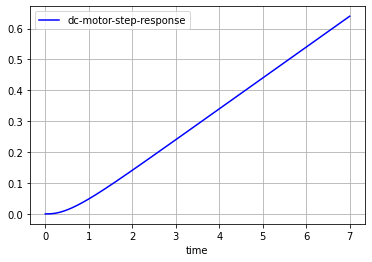

In [ ]:
T, yout = control.step_response(G_motor, T=np.linspace(0, 7, 1000));

plt.plot(T, yout, 'b', label='dc-motor-step-response')
plt.legend()
plt.xlabel('time')
plt.grid()

**9. Draw a block diagram of the field controlled DC motor from the field voltage to the position output using all the relevant equations calculated so far. Make sure you include the disturbance $T_d(s)$ as per equation (6).**


<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/dc-motor-field-current-bd.png" alt="dc-motor-field-current-bd" style="width: 600px;"/> </td>    
    </tr>
</table>
